In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.utils import resample
from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
from collections.abc import Iterable

def is_iterable(obj):
    return isinstance(obj, Iterable)

def is_indexable(obj):
    try:
        obj[0]
        return True
    except (TypeError, IndexError, KeyError):
        return False
        
def polygonset(x_poly=None,y_poly=None,Name=None):
    """
    没有参数情况下：
    生成默认四个多边形
    有参数时：
    支持创建一个或者多个多边形，并以输入的'Name'命名,下述例子中的list换成numpy数组也ok.
    eg1. 创建一个名字为 'p1'的多边形(以下都是合法输入)：
    polygonset(x_poly=[0,1,2,3,4],y_poly=[5,3,7,8,4],Name='p1')
    polygonset(x_poly=[[0,1,2,3,4]],y_poly=[[5,3,7,8,4]],Name='p1')
    polygonset(x_poly=[[0,1,2,3,4]],y_poly=[[5,3,7,8,4]],Name=['p1'])
    eg2. 创建两个个名字分别为 'p1','p2'的多边形(以下都是合法输入)：
    polygonset(x_poly=[[0,1,2,3,4],[1,2,3]],y_poly=[[5,3,7,8,4],[4,5,6]],Name=None)
    polygonset(x_poly=[[0,1,2,3,4],[1,2,3]],y_poly=[[5,3,7,8,4],[4,5,6]],Name=['p1','p2'])
    polygonset(x_poly={'p1':[0,1,2,3,4], 'p2':[1,2,3]},y_poly={'p1':[5,3,7,8,4],'p2':[4,5,6]},Name=None)
    polygonset(x_poly={'p1':[0,1,2,3,4], 'p2':[1,2,3]},y_poly={'p1':[5,3,7,8,4],'p2':[4,5,6]},Name=['p1','p2'])    
    """
    
    
    if (x_poly == None) & (y_poly == None):   
        Name = ['SPac','NPac','Atl','Ind']
        x_poly,y_poly,polygon = {},{},{}
        x_poly['SPac'] = [x + 360 if x < 20 else x for x in [117.743, 279.767, 290.973, 288.949, 291.595, 291.44, 145.447, 145.914, 136.42, 139.066, 115.097, 106.537, 102.49, 117.743]]
        y_poly['SPac'] = [-0.001, -0.001, -18.5912, -52.3509, -54.8401, -60, -60, -38.038, -12.2126, -6.7675, -9.10112, -6.45635, -0.001, -0.001]
        x_poly['NPac'] = [x + 360 if x < 20 else x for x in [102.646,102.179,98.5992,99.8444,139.222,255.019,262.023,274.786,276.498,283.969,283.346,280.078,102.646]]
        y_poly['NPac'] = [-0.001,5.05618,8.78997,15.4797,66.6638,63.8634,18.1245,12.9905,9.10112,7.54538,3.96716,-0.001,-0.001]
        x_poly['Atl'] = [x + 360 if x < 20 else x for x in [-81.323,-79.7665,-68.4047,-62.179,-26.537,-22.179,-14.8638,-5.05837,1.32296,-0.544747,-5.68093,-11.1284,-15.4864,-10.6615,
                    -2.41245,5.36965,11.5953,11.4397,15.0195,19.999,19.999,-68.5603,-68.4047,-70.7393,-65.6031,-58.4436,-48.9494,-39.2996,
                    -50.8171,-72.4514,-76.1868,-83.3463,-84.7471,-97.6654,-99.0661,-83.035,-68.0934,-64.5136,-70.7393,-81.323]]
        y_poly['Atl'] = [73.0424,78.0207,81.2878,79.5765,68.9974,65.5748,64.6413,58.5739,50.9507,42.2385,35.7044,25.1253,13.7684,8.0121,6.45635,
                    7.54538,4.58946,-2.41141,-19.6802,-33.8375,-60,-60,-54.3734,-52.3509,-38.5048,-32.1262,-24.3475,-12.057,
                    -1.94468,8.6344,7.85653,9.56785,13.9239,18.9023,30.1037,32.7485,52.3509,59.8185,65.5748,73.0424]
        x_poly['Ind'] = [x + 360 if x < 20 else x for x in [145.136,145.914,133.774,139.066,114.008,104.047,101.868,100.311,98.2879,99.0661,90.9728,57.1984,55.3307,40.5447,49.4163,37.5875,20,20,145.136]]
        y_poly['Ind'] = [-60,-37.8825,-14.2351,-6.30078,-9.41227,-5.83405,2.10026,6.45635,8.78997,16.8799,24.6586,29.0147,22.7917,10.5013,10.6569,-3.96716,-33.2152,-60,-60]
        for name in Name: 
            polygon[name] = Path(np.column_stack((x_poly[name], y_poly[name])))
    elif (x_poly != None) & (y_poly != None):
        if not is_iterable(obj):
            raise TypeError("Name must be an iterable.")
        if not is_indexable(obj):
            raise TypeError("Name must be an indexable.")
        if not isinstance(x_poly[0], (int, float)):
            if Name == None: #name是none就不取名了
                n1,n2 = len(x_poly),len(y_poly)
                if n1 == n2:
                    if type(x_poly) == dict & type(y_poly) == dict:
                        if set(x_poly) != set(Name):
                            raise ValueError("Input 'Name' must match the keys of 'x_poly' and 'y_poly'.")
                        else:
                            for name in Name:
                                polygon[name] =  Path(np.column_stack((x_poly[name], y_poly[name])))
                            
                    elif type(x_poly) != dict & type(y_poly) != dict:
                        polygon = []
                        for i in range(n1):
                            polygon.append(Path(np.column_stack((x_poly[i], y_poly[i]))))  
            else:
                if not is_iterable(Name):
                    raise TypeError("Name must be an iterable.")      
                # 检查 Name 中的每个元素是否都是字符串
                if not all(isinstance(item, str) for item in Name):
                    raise TypeError("All elements in Name must be strings.")
                n1,n2,n3 = len(x_poly),len(y_poly),len(Name)
                if n1 == n2 & n1 ==n3:
                    if type(x_poly) == dict & type(y_poly) == dict:
                        if set(x_poly) != set(Name):
                            raise ValueError("Input 'Name' must match the keys of 'x_poly' and 'y_poly'.")
                        else:
                            for name in Name:
                                polygon[name] =  Path(np.column_stack((x_poly[name], y_poly[name])))
                            
                    elif type(x_poly) != dict & type(y_poly) != dict:
                        for i in range(n1):
                            polygon[Name[i]] =  Path(np.column_stack((x_poly[i], y_poly[i])))
                else: 
                    raise ValueError("Input 'x_poly' and 'y_poly' and 'Name' must have same length.")
        else: 
            if Name == None:
                polygon = Path(np.column_stack((x_poly, y_poly)))
            else:
                polygon = {}
                if type(Name) != str:
                    Name = str(Name)
                    polygon[Name] = Path(np.column_stack((x_poly, y_poly)))
                else:
                    polygon[Name] = Path(np.column_stack((x_poly, y_poly)))
    return polygon

def namingpolygon(polygon,Name=None):
    ## polygon
    if is_iterable(polygon):
        if is_indexable(polygon): #是否可以索引
            # 可索引对象
            first_element = polygon[0]
            validity_polygon = 'iterable'
        else:
            iterator = iter(polygon.values())
            first_element = next(iterator)
            validity_polygon = 'iterable'
        if type(first_element) != Path:
             raise ValueError("Input 'Polygon' must be a matplotlib.path.Path object.")
    elif type(polygon) == Path:
        validity_polygon = 'Path'
    ## Name
    if Name == None:
        if validity_polygon == 'iterable':
            if type(polygon) == dict:
                Name = list(polygon.keys())
            else:
                n = len(polygon)            
                Name = [] 
                tmp_p = polygon.copy()
                polygon = {}
                for i in range(n):                                        
                    polygon[f'Box{i}'] = tmp_p[i]  
                    Name.append(f'Box{i}')        
        elif validity_polygon == 'Path':
            Name = ['Box0']
    elif Name != None:
        if not is_iterable(Name):
            raise TypeError("Name must be an iterable.")      
        # 检查 Name 中的每个元素是否都是字符串
        if not all(isinstance(item, str) for item in Name):
            raise TypeError("All elements in Name must be strings.")
            
        if validity_polygon == 'iterable':
            if type(polygon) == dict:
                Name_poly = list(polygon.keys())
                if set(Name_poly) != set(Name):
                    raise ValueError("Input 'Name' must match the keys of 'polygon'.")
            else:
                tmp_p = polygon.copy()
                polygon = {}
                for name,p in zip(Name,tmp_p):
                    polygon[name] = p                   
        elif validity_polygon == 'Path':
            tmp_p = polygon.copy()
            polygon = {}
            polygon[name] = tmp_p
    return polygon,Name 
    
def volume_stratified(polygon,data,boundary,interval,Name=None,output=None):# Name:Ocean name; data: Altitude data
    print(f'\n\nCalculating stratified volume...')
    print(f'Note: this calculation step consumes a large amount of memory\n')
    ## boundary
    if len(boundary) != 2:
        raise ValueError("boundary must have exactly two elements.")       
    ## 检查 interval 是否是一个数字
    if not isinstance(interval, (int, float)):
        raise TypeError("interval must be a number.")
    polygon, Name = namingpolygon(polygon,Name)       
    depth_volumes = {}
    # 获取x, y, z值
    x_values = data['x'].values
    y_values = data['y'].values
    z_values = data['z'].values     
    # 计算网格中心坐标
    x_center = x_values[:-1] + (x_values[1] - x_values[0]) / 2
    x_center = [x + 360 if x < 20 else x for x in x_center]
    y_center = y_values[:-1] + (y_values[1] - y_values[0]) / 2
    z_center = np.zeros((len(y_center), len(x_center))) 
    
    z1 = z_values[:-1, :-1]
    z2 = z_values[1:, :-1]
    z3 = z_values[:-1, 1:]
    z4 = z_values[1:, 1:]    
    # 计算网格中心的加权高度
    z_center = (z1 + z2 + z3 + z4) / 4
    x_len = np.array([(data['x'][1:].values -data['x'][0:-1].values)*(np.pi/180)])
    y_len = np.array([(data['y'][1:].values -data['y'][0:-1].values)*(np.pi/180)]).transpose()
    R = 6371
    r_lat = np.array([R * np.cos(abs(y_center)*(np.pi/180))]).transpose()
    r_lon = R*np.ones((1,z_center.shape[1]))
    X = np.dot(r_lat,x_len)
    Y = np.dot(y_len,r_lon)
    # 创建网格中心坐标矩阵
    xx, yy = np.meshgrid(x_center, y_center)
    mask1 = z_center < 0    
    grid_area = X * Y  # 单位体积，每100米乘以100
    points = np.column_stack((xx.ravel(), yy.ravel()))
    depth_bins = np.arange(-( boundary[1]+ interval),  boundary[0], interval)
    for name in Name: 
        # 判断点是否在多边形内
        mask2 = polygon[name].contains_points(points).reshape(xx.shape)
        mask = mask2 & mask1
        # 过滤出在多边形内的网格中心
        z_center_in_poly = z_center[mask]    
        # 初始化每100米深度的体积加权均值

        depth_volumes[name] = np.zeros(len(depth_bins) - 1)
        # 计算每100米深度的体积
        for i in range(len(depth_bins) - 1):
            upper_bound = depth_bins[i]
            lower_bound = depth_bins[i + 1]
            depth_mask0 = (z_center <= lower_bound) & mask
            depth_mask1 = ((z_center > lower_bound) & (z_center < upper_bound)) & mask
            volume1, volume2 = 0, 0
            if np.any(depth_mask0):
                volume1 = np.sum(grid_area[depth_mask0] * (0.1))  # 0.1 in 'km'
            if np.any(depth_mask1):
                volume2 = np.sum(grid_area[depth_mask1] * (upper_bound - z_center[depth_mask1])/1000)
            depth_volumes[name][i] = volume1 + volume2            
    print(f'Calculating done, results are as follows:\n')
    depth_bins_output = np.arange(boundary[0], boundary[1]+ interval, interval)        
    # 创建数据字典
    depth_volumes['Depth Range'] = [f'({depth_bins_output[i]},{depth_bins_output[i + 1]})' for i in range(len(depth_bins_output) - 1)]
    # 创建DataFrame
    df = pd.DataFrame(depth_volumes)   
    print(df.head(len(depth_bins_output) - 1))
    if output == 'y':
        # 将DataFrame导出为Excel文件
        df.to_excel('ocean_depth_volumes.xlsx', index=False)        
        print("Data has been written to ocean_depth_volumes.xlsx")
    return depth_volumes

def locationshow(lon,lat,centeral_lon,title=None):
    fig = plt.figure(figsize=(6, 4), \
    dpi=150, facecolor='w')
    # 创建 Basemap 对象
    map = Basemap(projection='cyl',lon_0=centeral_lon,resolution='c')
    # 将经度和纬度转换为地图投影坐标
    # lons,lats = map.shiftdata(lons,lats)
    # 绘制点
    map.plot(lon, lat, 'ro', markersize=1)
    # 添加海岸线
    map.drawcoastlines()
    plt.title(title)
    plt.show()

# 进行线性拟合
def fit_linear_model(x, y, degree):
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x.reshape(-1, 1))
    poly_model = LinearRegression()
    poly_model.fit(x_poly, y)
    #model.fit(x, y)
    return poly_model, poly, poly_model.predict(x_poly)

# 绘制原始数据拟合结果
def fitshow(origindata,fitdata,title=None):
    fig, ax = plt.subplots(figsize=(4, 6)) 
    ax.scatter(origindata[:,1], origindata[:,0],color='red')
    depth_bins = fitdata[:,0]   
    ax.plot(fitdata[:,1], fitdata[:,0], color='blue')    
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    plt.title(title)
    plt.show()    

def bootstrapping(data, std, iterations, Volume=None, boundary=None, interval=None, n=None, fit=True):
    # 检查fit参数，并确保在fit为True时提供了其他必要参数
    if fit == True:
        if Volume is None or boundary is None or interval is None or n is None:
            raise ValueError("When fit is 'True', you must provide Volume, boundary, interval, and n parameters.")
        if np.ndim(data) != 2:
            raise ValueError("When fit is 'True', your data must be 2-D array")
    elif fit == False:
        if np.ndim(data) != 1:
            raise ValueError("When fit is 'False', your data must be 1-D array")
    # 处理fit为False的情况
    if fit == False:
        print("Fit is not True. Processing without Volume, boundary, interval, and n parameters.")
        
        # 使用bootstrap方法计算data的均值和标准差
        n = len(data)
        bootstrap_means = np.empty(iterations)
        bootstrap_stds = np.empty(iterations)

        for i in range(iterations):
            noisy_data = data + np.random.normal(0, std, size=std.shape)   
            resampled_data = np.random.choice(noisy_data, size=n, replace=True) 
            bootstrap_means[i] = np.mean(resampled_data)
            bootstrap_stds[i] = np.std(resampled_data)
        
        mean_estimate = np.mean(bootstrap_means)
        std_estimate = np.mean(bootstrap_stds)
        
        return mean_estimate, std_estimate
    
    # 如果fit为True，处理相关逻辑
    
    if fit == True:
        print(f"Note: This is Bootstrapped estimate of fit curve error and volume weighted value. The fitting method is polynomial with highest power {n}\n")
        bootstrapped_errors = []
        volume_weighted_value = []
        depth = data[:,0]
        value = data[:,1]
        Volume_sum = np.sum(Volume)
        depth_bins = np.arange(boundary[0]+interval/2, boundary[1]+interval/2, +interval)
        # 进行bootstrapping迭代
        for i in range(iterations):
            # 对每个数据点添加测量误差
            noisy_value = value + np.random.normal(0, std, size=value.shape)        
            # 拟合带噪声的数据
            model, poly, predictions= fit_linear_model(depth, noisy_value, n)            
            depth_bins_poly = poly.fit_transform(depth_bins.reshape(-1, 1))
            data_bins_poly = model.predict(depth_bins_poly)
            volume_weighted_value.append(np.sum(Volume * data_bins_poly / Volume_sum))       
            # 计算拟合误差
            residuals = noisy_value - predictions
            error= np.sqrt(np.mean(residuals**2))
            # 存储拟合结果和误差
            bootstrapped_errors.append(error)  
            
        #计算均值，误差
        value_mean = np.mean(volume_weighted_value) #bootstrapping mean value
        error_CI = np.percentile(bootstrapped_errors, [2.5, 97.5])
        error_mean = np.mean(bootstrapped_errors)
        print(f'Bootstrapping Results')
        print(f'volume-weighted fit value (bootstrapped mean): {value_mean}')    
        print(f'RMSE(bootstrapped mean): {error_mean}')
        print(f'RMSE 95% CI: {error_CI}\n\n')

def analyze(data = {'lons':None,'lats':None,'depth':None,'var':None,'std':None,'depth_volumes':None,'polygon':None},bootstrap_var={'iterations':100000,'boundary':[0,5000],'interval':100,'n':1,'fit':True}):
    for value in data.values():
        if type(value) == type(None):
            raise ValueError("You must assign all parameters")
    lons = data['lons']
    lats = data['lats']
    depth = data['depth']
    var = data['var']
    std = data['std']
    depth_volumes = data['depth_volumes']
    polygon = data['polygon']
    iterations = bootstrap_var['iterations']
    boundary = bootstrap_var['boundary']
    interval = bootstrap_var['interval']
    n = bootstrap_var['n']
    fit = bootstrap_var['fit']    
    locationshow(lons,lats,200,'AllDataSite')
    points = np.column_stack((lons, lats))
    polygon,Name = namingpolygon(polygon)
    for name in Name: 
        print(f'\n{name}:')
        # 判断点是否在多边形内
        mask = polygon[name].contains_points(points)    
        locationshow(lons[mask],lats[mask],200,name)
        var_Region = np.array(var[mask])
        depth_Region = np.array(depth[mask])       
        var_Region[np.isnan(var_Region)] = np.nanmean(var_Region)
        if np.ndim(std) == 1: 
            std_Region = std[mask]
              ########################################################################## std怎么处理            
            std_Region[np.isnan(std_Region)] = np.mean(std_Region)
        if isinstance(std, float):  
            std_Region = std
        Volume = depth_volumes[name]
        Volume_sum = np.sum(Volume)
        origindata = np.array([depth_Region, var_Region]).transpose()
        # 数据拟合
        model, poly, predictions= fit_linear_model(depth_Region, var_Region, n)
        # 拟合结果
        depth_bins = np.arange(boundary[0]+interval/2, boundary[1]+interval/2, +interval)
        data_bins = model.predict(poly.fit_transform(depth_bins.reshape(-1, 1)))
        fitdata = np.array([depth_bins, data_bins]).transpose()
        fitshow(origindata,fitdata,name)
        residuals = origindata[:,1] - model.predict(poly.fit_transform(origindata[:,0].reshape(-1, 1)))
        error = np.sqrt(np.mean(residuals**2))
        Volume_sum = np.sum(Volume)
        volume_weighted_value = np.sum(Volume * fitdata[:,1] / Volume_sum)
        print(f'unweighted origin value : {np.mean(var_Region)}')
        print(f'volume-weighted fit value: {volume_weighted_value}')
        print(f'RMSE: {error}')
        print(f'Origin mean std: {np.mean(std_Region)}\n')        
        # bootstrapping 估算加权值以及拟合误差
        print(f'Bootstrapping...\n')
        bootstrapping(origindata,std_Region,iterations,Volume,boundary,interval,n,fit=fit)

def main():
    print(f'****** This program uses the bootstrapping method to estimate the uncertainty of polynomial fitting of oceanic block data ******\n')

    depth_volumes_available = input("Do you have volume data stratified by depth intervals? (y/n): ").strip().lower()

    polygon = polygonset()

    if depth_volumes_available == 'y':
        depth_volumes_path = input("Please enter the file path for the volume data stratified by depth intervals: ")
        depth_volumes = pd.read_excel(depth_volumes_path)
    else:
        global_elevation_data_path = input("Please enter the file path for the global elevation data (used for volume calculation): ")
        global_elevation_data = xr.open_dataset(global_elevation_data_path)

    if depth_volumes_available != 'y':
        boundary_upper = float(input("Please enter the upper boundary of the depth interval: "))
        boundary_lower = float(input("Please enter the lower boundary of the depth interval: "))
        interval = float(input("Please enter the interval for volume stratification: "))
        boundary = [boundary_upper, boundary_lower]
        polygon, Name = namingpolygon(polygon)
        output = input("Do you need to output the result as an Excel file? (y/n): ").strip().lower()
        depth_volumes = volume_stratified(polygon, global_elevation_data, boundary, interval, Name, output)
    else:
        depth_volumes_provided = input("Is the provided volume stratification in the range [0,5000] with an interval of 100? (y/n): (By default, this program uses this stratification method for subsequent analysis)").strip().lower()
        if depth_volumes_provided == 'y':
            boundary = [0, 5000]
            interval = 100
        else:
            boundary_upper = float(input("Please enter the upper boundary of the depth interval: "))
            boundary_lower = float(input("Please enter the lower boundary of the depth interval: "))
            boundary = [boundary_upper, boundary_lower]
            interval = float(input("Please enter the interval for volume stratification: "))
        print(f'The provided volume stratification is in the range [0,5000] with an interval of 100\n')

    df_path = input("Please enter the path to the data file (.xlsx): ")
    df = pd.read_excel(df_path)

    # Prompt the user to specify the columns for the variables
    lons_col = int(input("Please enter the column number for longitude (starting from 1): ")) - 1
    lats_col = int(input("Please enter the column number for latitude (starting from 1): ")) - 1
    var_col = int(input("Please enter the column number for the target variable (starting from 1): ")) - 1
    depth_col = int(input("Please enter the column number for depth (starting from 1): ")) - 1

    # Handle missing values
    df.replace('NAN', np.nan, inplace=True)
    df.iloc[:, var_col] = pd.to_numeric(df.iloc[:, var_col], errors='coerce')

    # Extract variables
    lons = df.iloc[:, lons_col]
    lons = np.array([x + 360 if x < 20 else x for x in lons])
    lats = df.iloc[:, lats_col]
    var = df.iloc[:, var_col]
    depth = df.iloc[:, depth_col]

    # Confirm if there is a standard deviation column in the dataframe
    std_col_exists = input("Is there a column for error data in the table? (y/n): ").strip().lower()
    if std_col_exists == 'y':
        std_col = int(input("Please enter the column number for the error data (starting from 1): ")) - 1
        std = df.iloc[:, std_col].mean()  # Assuming the mean value is used as std
    else:
        std = float(input("Please enter the fixed error value as a float (enter 0 if none): "))

    # Default boundary and interval
    boundary = [0, 5000]
    interval = 100

    # Create data dictionary
    data = {
        'lons': lons,
        'lats': lats,
        'depth': depth,
        'var': var,
        'std': std,
        'depth_volumes': depth_volumes,
        'polygon': polygon
    }

    # Prompt the user to input parameters for bootstrapping
    iterations = int(input("Please enter the number of iterations for bootstrapping: "))
    n = int(input("Please enter the highest polynomial degree for fitting: "))
    print(f'********************************************\n\n')
    bootstrap_var = {
        'iterations': iterations,
        'boundary': boundary,
        'interval': interval,
        'n': n,
        'fit': True
    }
    # Call the analyze function
    analyze(data=data, bootstrap_var=bootstrap_var)


****** This program uses the bootstrapping method to estimate the uncertainty of polynomial fitting of oceanic block data ******



Do you have volume data stratified by depth intervals? (y/n):  n
Please enter the file path for the global elevation data (used for volume calculation):  ETOPO1_Ice_g_gmt4.grd
Please enter the upper boundary of the depth interval:  0
Please enter the lower boundary of the depth interval:  5000
Please enter the interval for volume stratification:  100
Do you need to output the result as an Excel file? (y/n):  n




Calculating stratified volume...
Note: this calculation step consumes a large amount of memory

Calculating done, results are as follows:

            SPac          NPac           Atl           Ind      Depth Range
0   1.347139e+06  3.138063e+06  1.740701e+06  1.161607e+06      (0.0,100.0)
1   1.592111e+06  3.412111e+06  2.048431e+06  1.384743e+06    (100.0,200.0)
2   1.850429e+06  3.671762e+06  2.355197e+06  1.599837e+06    (200.0,300.0)
3   2.127567e+06  3.914384e+06  2.640822e+06  1.835568e+06    (300.0,400.0)
4   2.429926e+06  4.145405e+06  2.917110e+06  2.103801e+06    (400.0,500.0)
5   2.737257e+06  4.377184e+06  3.202468e+06  2.391385e+06    (500.0,600.0)
6   3.059440e+06  4.621640e+06  3.485760e+06  2.680910e+06    (600.0,700.0)
7   3.404417e+06  4.865515e+06  3.748551e+06  2.959370e+06    (700.0,800.0)
8   3.771644e+06  5.073389e+06  3.997681e+06  3.223123e+06    (800.0,900.0)
9   4.130848e+06  5.256168e+06  4.243441e+06  3.471367e+06   (900.0,1000.0)
10  4.484822e+06  5.425

Please enter the path to the data file (.xlsx):  O2.xlsx
Please enter the column number for longitude (starting from 1):  3
Please enter the column number for latitude (starting from 1):  2
Please enter the column number for the target variable (starting from 1):  7
Please enter the column number for depth (starting from 1):  4
Is there a column for error data in the table? (y/n):  y
Please enter the column number for the error data (starting from 1):  8
Please enter the number of iterations for bootstrapping:  10000
Please enter the highest polynomial degree for fitting:  1


********************************************




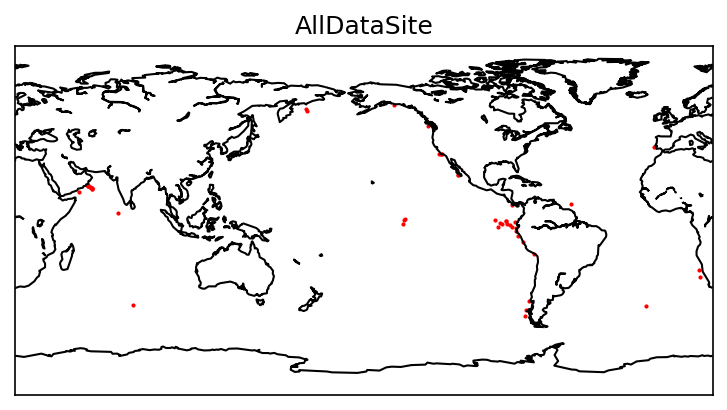


SPac:


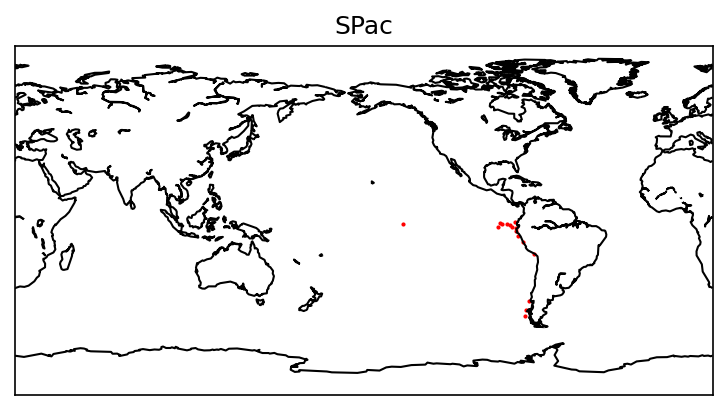

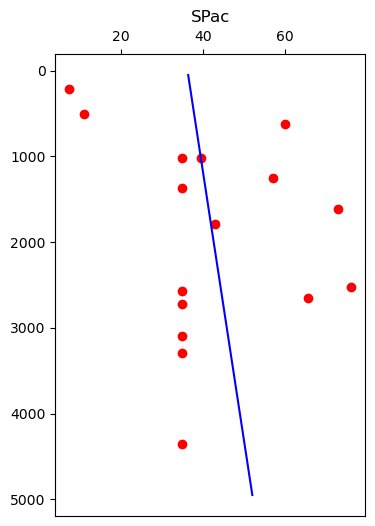

unweighted origin value : 42.383088541666666
volume-weighted fit value: 45.662489990492595
RMSE: 18.58210260085987
Origin mean std: 23.1178822822591

Bootstrapping...

Note: This is Bootstrapped estimate of fit curve error and volume weighted value. The fitting method is polynomial with highest power 1

Bootstrapping Results
volume-weighted fit value (bootstrapped mean): 45.75008707885527
RMSE(bootstrapped mean): 28.07223944741434
RMSE 95% CI: [18.72036379 37.91553909]



NPac:


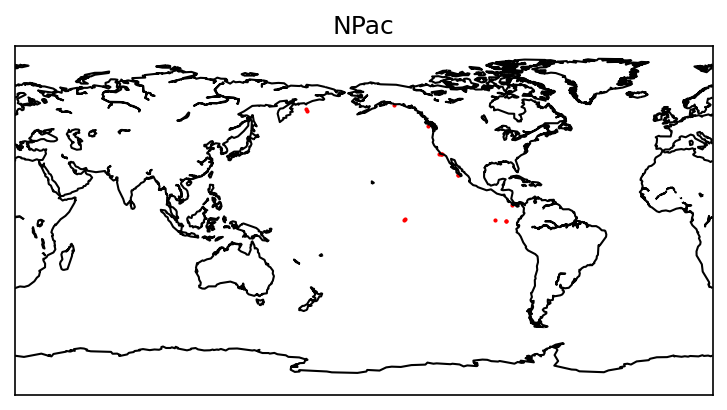

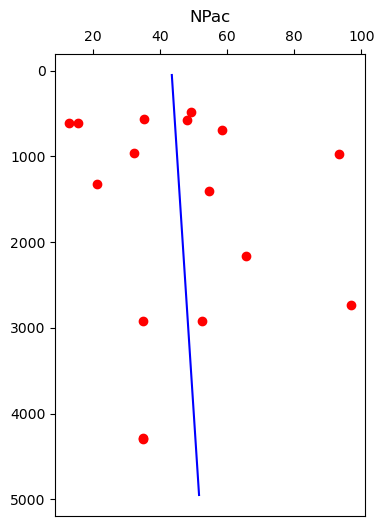

unweighted origin value : 46.3355389871705
volume-weighted fit value: 48.043539262653304
RMSE: 23.348300895383044
Origin mean std: 23.1178822822591

Bootstrapping...

Note: This is Bootstrapped estimate of fit curve error and volume weighted value. The fitting method is polynomial with highest power 1

Bootstrapping Results
volume-weighted fit value (bootstrapped mean): 48.009725730193836
RMSE(bootstrapped mean): 31.336896406337804
RMSE 95% CI: [21.74948041 41.62597041]



Atl:


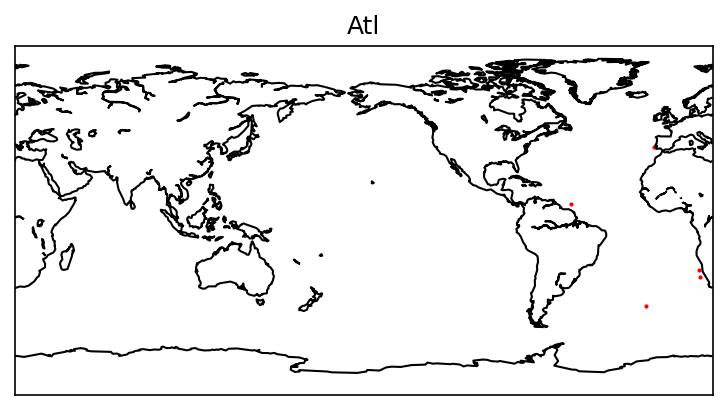

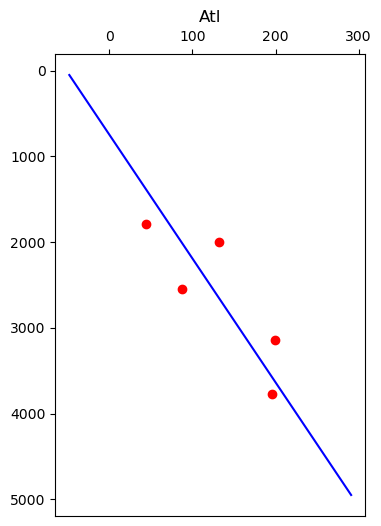

unweighted origin value : 131.7466612426575
volume-weighted fit value: 147.5855957557391
RMSE: 33.233219523434336
Origin mean std: 23.1178822822591

Bootstrapping...

Note: This is Bootstrapped estimate of fit curve error and volume weighted value. The fitting method is polynomial with highest power 1

Bootstrapping Results
volume-weighted fit value (bootstrapped mean): 147.4804411994361
RMSE(bootstrapped mean): 36.568160832791726
RMSE 95% CI: [17.72224847 55.95652129]



Ind:


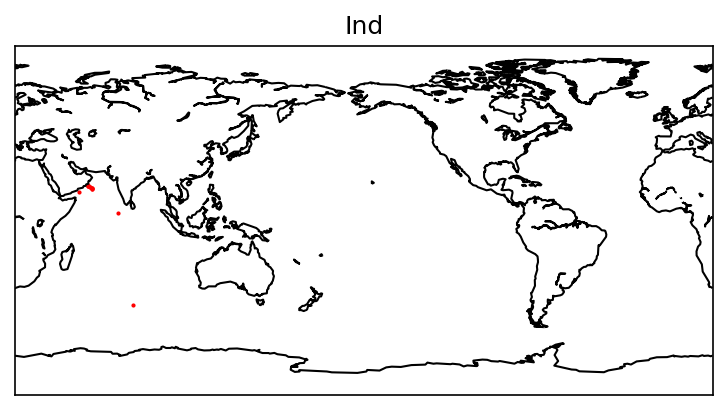

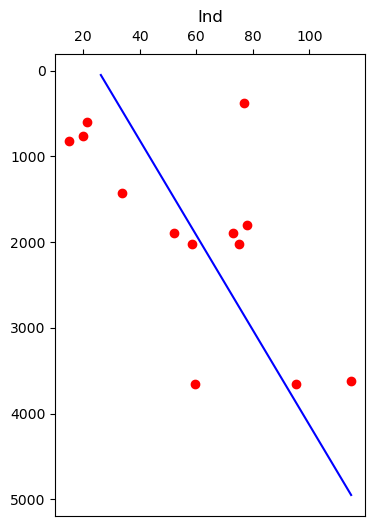

unweighted origin value : 59.402877534397554
volume-weighted fit value: 78.09668436028309
RMSE: 21.390471309818505
Origin mean std: 23.1178822822591

Bootstrapping...

Note: This is Bootstrapped estimate of fit curve error and volume weighted value. The fitting method is polynomial with highest power 1

Bootstrapping Results
volume-weighted fit value (bootstrapped mean): 77.98861250787428
RMSE(bootstrapped mean): 29.62961240674616
RMSE 95% CI: [19.01191204 40.8614008 ]




In [5]:
if __name__ == "__main__":
    main()

****** This program uses the bootstrapping method to estimate the uncertainty of polynomial fitting of oceanic block data ******



Do you have volume data stratified by depth intervals? (y/n):  y
Please enter the file path for the volume data stratified by depth intervals:  ocean_depth_volumes.xlsx
Is the provided volume stratification in the range [0,5000] with an interval of 100? (y/n): (By default, this program uses this stratification method for subsequent analysis) y


The provided volume stratification is in the range [0,5000] with an interval of 100



Please enter the path to the data file (.xlsx):  F:/ECNU/Paper/x/Peterson/ts01.xlsx
Please enter the column number for longitude (starting from 1):  4
Please enter the column number for latitude (starting from 1):  3
Please enter the column number for the target variable (starting from 1):  6
Please enter the column number for depth (starting from 1):  5
Is there a column for error data in the table? (y/n):  n
Please enter the fixed error value as a float (enter 0 if none):  0.16
Please enter the number of iterations for bootstrapping:  10000
Please enter the highest polynomial degree for fitting:  1


********************************************




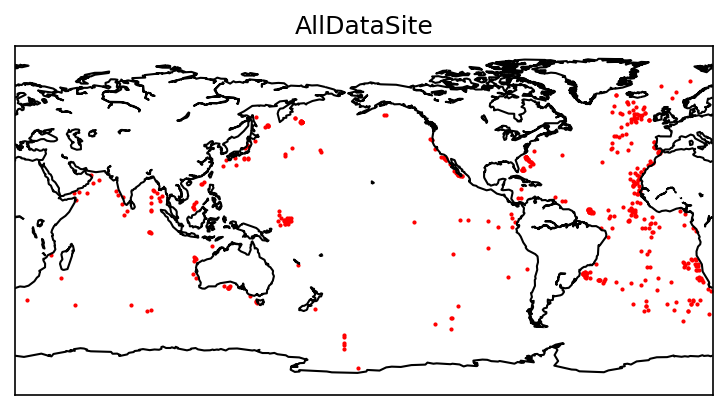


SPac:


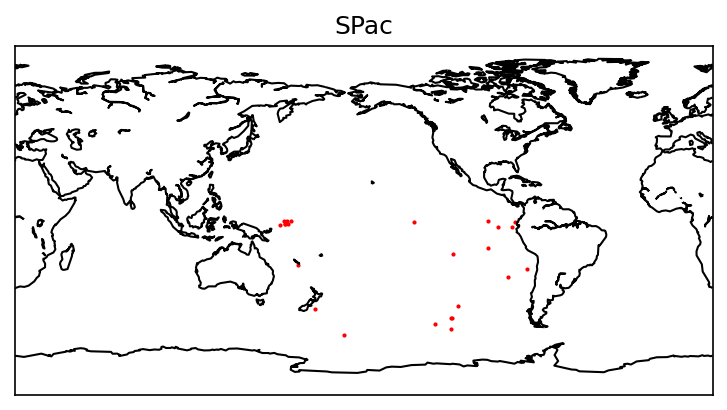

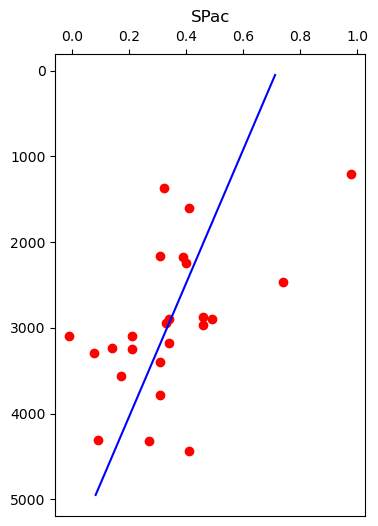

unweighted origin value : 0.33985652173913045
volume-weighted fit value: 0.3406351709583823
RMSE: 0.17349873194189008
Origin mean std: 0.16

Bootstrapping...

Note: This is Bootstrapped estimate of fit curve error and volume weighted value. The fitting method is polynomial with highest power 1

Bootstrapping Results
volume-weighted fit value (bootstrapped mean): 0.34030078066908964
RMSE(bootstrapped mean): 0.2297628854384403
RMSE 95% CI: [0.17399977 0.28724034]



NPac:


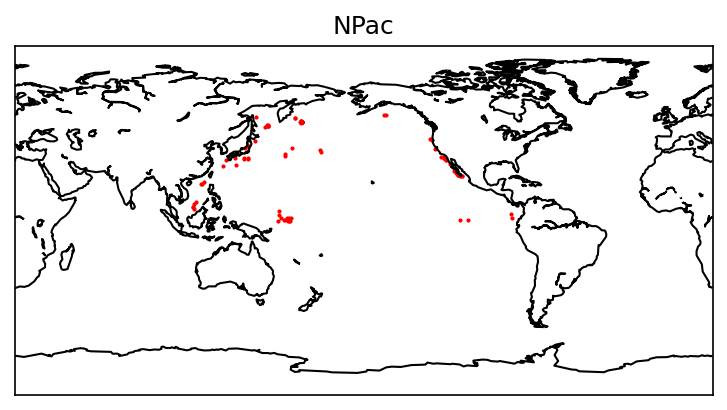

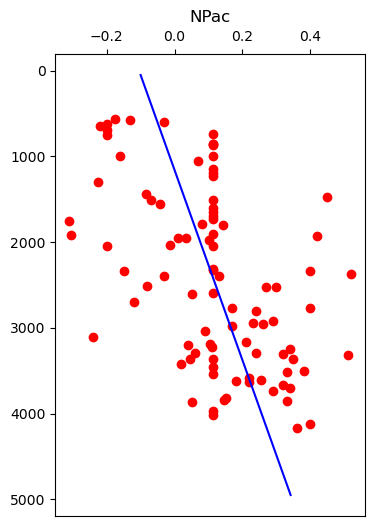

unweighted origin value : 0.11372428571428574
volume-weighted fit value: 0.1435532932844309
RMSE: 0.15947762130760354
Origin mean std: 0.16

Bootstrapping...

Note: This is Bootstrapped estimate of fit curve error and volume weighted value. The fitting method is polynomial with highest power 1

Bootstrapping Results
volume-weighted fit value (bootstrapped mean): 0.14338886708555104
RMSE(bootstrapped mean): 0.2245285025591224
RMSE 95% CI: [0.19674354 0.2528412 ]



Atl:


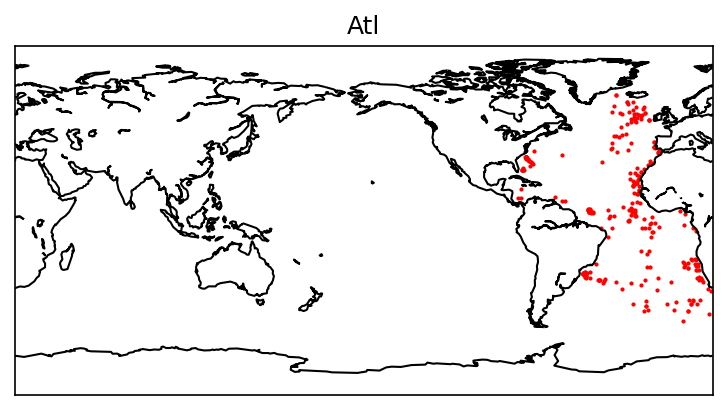

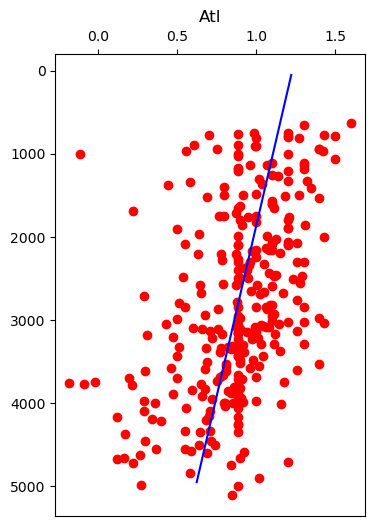

unweighted origin value : 0.8855603053435114
volume-weighted fit value: 0.8770751113949792
RMSE: 0.2695007701221892
Origin mean std: 0.16

Bootstrapping...

Note: This is Bootstrapped estimate of fit curve error and volume weighted value. The fitting method is polynomial with highest power 1

Bootstrapping Results
volume-weighted fit value (bootstrapped mean): 0.8769948061809449
RMSE(bootstrapped mean): 0.3130918015282278
RMSE 95% CI: [0.29631596 0.32996111]



Ind:


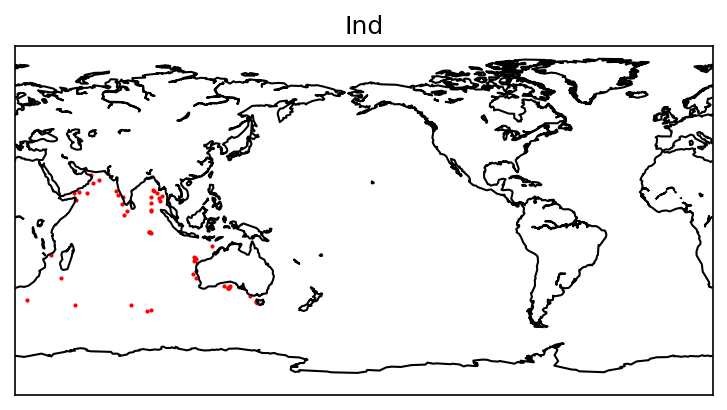

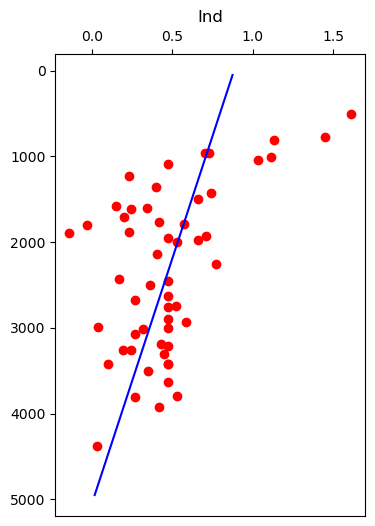

unweighted origin value : 0.4741659090909091
volume-weighted fit value: 0.37197949712488226
RMSE: 0.28081891174489165
Origin mean std: 0.16

Bootstrapping...

Note: This is Bootstrapped estimate of fit curve error and volume weighted value. The fitting method is polynomial with highest power 1

Bootstrapping Results
volume-weighted fit value (bootstrapped mean): 0.3724343382407382
RMSE(bootstrapped mean): 0.32111509167852337
RMSE 95% CI: [0.28163283 0.36122772]




In [3]:
if __name__ == "__main__":
    main()